In [1]:
%matplotlib inline

%matplotlib inline
%load_ext autoreload
%autoreload 2

import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import regionmask
import pandas as pd
from datetime import datetime, timedelta
import utils
from matplotlib.colors import SymLogNorm
import xesmf as xe
from matplotlib import pyplot as plt, animation
from IPython.display import HTML, display
from matplotlib.lines import Line2D


import itertools

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection, PolyCollection
import numpy as np

import cartopy.feature
from cartopy.mpl.patch import geos_to_path
import cartopy.crs as ccrs
import cmocean

import scipy.signal as signal




regions = ['SEA', 'Indo','Malay','all_countries','Viet','Cambod']
months = ['Jan','Apr','July', 'Oct'] #options are Jan, Apr, July, Oct
time = '2016'
#compare_2x = True #True allows for comparison to the 2x simulation to see the performance of the GF; False just creates a new GF
#global_mean = True #False turns on a spatially explicit version with lat and lon; True turns on a global weighted mean
length_simulation = 60 #days
diagnostic = 'SpeciesConc'


# In[3]:


for m in months:
    print(m)


# ## Import monthly data for 2x

dict_conc = {}
dict_emis = {}


pulse_size = '2x'
for r in regions:
    for m in months:
        print(m)
        print(r)
        #2x pulse for GF
        dict_conc[r + '_' + m] = xr.open_mfdataset(f'../GCrundirs/IRF_runs/stretch_{pulse_size}_pulse/{r}/{m}/mod_output/GEOSChem.SpeciesConc.{time}*', combine = 'by_coords')
        #2x pulse for GF
        dict_emis[r + '_' + m] = xr.open_mfdataset(f'../GCrundirs/IRF_runs/stretch_{pulse_size}_pulse/{r}/{m}/mod_output/GEOSChem.Emissions.{time}*', combine = 'by_coords')
        if (dict_conc[r + '_' + m]['time'].diff('time').astype('float64') > 86400000000000).any():
            print('CHECK TIME, FAILED')

for m in months:
    dict_conc[f'base_{m}'] = xr.open_mfdataset(f'../GCrundirs/IRF_runs/stretch_base/template/{m}/mod_output/GEOSChem.SpeciesConc.{time}*', combine = 'by_coords', engine = 'netcdf4')
    dict_emis[f'base_{m}'] = xr.open_mfdataset(f'../GCrundirs/IRF_runs/stretch_base/template/{m}/mod_output/GEOSChem.Emissions.{time}*', combine = 'by_coords', engine = 'netcdf4')
    if (dict_conc[f'base_{m}']['time'].diff('time').astype('float64') > 86400000000000).any():
            print('CHECK TIME, FAILED')


# ## Import 16x for comparison

pulse_size = '16x'
for r in regions:
    for m in ['Jan']:
        #2x pulse for GF
        dict_conc[r + '_' + m + '_' + pulse_size] = xr.open_mfdataset(f'../GCrundirs/IRF_runs/stretch_{pulse_size}_pulse/{r}/{m}/mod_output/GEOSChem.SpeciesConc.{time}*', combine = 'by_coords')
        #2x pulse for GF
        dict_emis[r + '_' + m+ '_' + pulse_size] = xr.open_mfdataset(f'../GCrundirs/IRF_runs/stretch_{pulse_size}_pulse/{r}/{m}/mod_output/GEOSChem.Emissions.{time}*', combine = 'by_coords')
        
        if (dict_conc[r + '_' + m + '_' + pulse_size]['time'].diff('time').astype('float64') > 86400000000000).any():
            print('CHECK TIME, FAILED-- Check the regridding as not all times were regridded')




for m in months:
    dict_conc[f'all_countries_summed_{m}'] = dict_conc[f'Indo_{m}'] + dict_conc[f'Malay_{m}'] + dict_conc[f'Viet_{m}'] + dict_conc[f'Cambod_{m}']


### Import Data across January Comparison


days = ['6', '11', '16', '21', '26']
pulse_size = '2x'
for d in days:
    print(d)
    #2x pulse for GF
    dict_conc['Indo_Jan_' + d] = xr.open_mfdataset(f'../GCrundirs/IRF_runs/stretch_{pulse_size}_pulse/Jan_uncertainty_Indo/Jan{d}_pulse/mod_output/GEOSChem.SpeciesConc.{time}*', combine = 'by_coords')
    #2x pulse for GF
    dict_emis['Indo_Jan_' + d] = xr.open_mfdataset(f'../GCrundirs/IRF_runs/stretch_{pulse_size}_pulse/Jan_uncertainty_Indo/Jan{d}_pulse/mod_output/GEOSChem.Emissions.{time}*', combine = 'by_coords')
    
    if (dict_conc['Indo_Jan_' + d]['time'].diff('time').astype('float64') > 86400000000000).any():
        print('CHECK TIME, FAILED-- Check the regridding as not all times were regridded')
        
for d in days:
    dict_conc[f'base_Jan_{d}'] = xr.open_mfdataset(f'../GCrundirs/IRF_runs/stretch_base/template/Jan{d}_pulse/mod_output/GEOSChem.SpeciesConc.{time}*', combine = 'by_coords', engine = 'netcdf4')
    dict_emis[f'base_Jan_{d}'] = xr.open_mfdataset(f'../GCrundirs/IRF_runs/stretch_base/template/Jan{d}_pulse/mod_output/GEOSChem.Emissions.{time}*', combine = 'by_coords', engine = 'netcdf4')


### Import Data across Indonesia location comparison


locations = ['Center','NW','SE']
pulse_size = '2x'
for loc in locations:
    print(loc)
    #2x pulse for GF
    dict_conc['Indo_Jan_' + loc] = xr.open_mfdataset(f'../GCrundirs/IRF_runs/stretch_{pulse_size}_pulse/loc_uncertainty_Indo/{loc}_pulse/mod_output/GEOSChem.SpeciesConc.{time}*', combine = 'by_coords')
    #2x pulse for GF
    dict_emis['Indo_Jan_' + loc] = xr.open_mfdataset(f'../GCrundirs/IRF_runs/stretch_{pulse_size}_pulse/loc_uncertainty_Indo/{loc}_pulse/mod_output/GEOSChem.Emissions.{time}*', combine = 'by_coords')
    if (dict_conc['Indo_Jan_' + loc]['time'].diff('time').astype('float64') > 86400000000000).any():
        print('CHECK TIME, FAILED-- Check the regridding as not all times were regridded')


#shift our time so that it is halfway through the day to represent the daily mean
for i in dict_emis.keys():
    utils.switch_conc_time(dict_emis[i])
    #shift our time so that it is halfway through the day to represent the daily mean
for i in dict_conc.keys():
    utils.switch_conc_time(dict_conc[i])
    #change the time to be delta time
    dict_conc[i]['time'] = dict_conc[i]['time']-dict_conc[i]['time'][0]
    #fix the area
    dict_conc[i]= utils.fix_area_ij_latlon(dict_conc[i])
    #sum all BC conc
    dict_conc[i]['BC_total'] = dict_conc[i]['SpeciesConc_BCPI'] + dict_conc[i]['SpeciesConc_BCPO']
    
for i in dict_emis.keys():
    #change the time to be delta time
    dict_emis[i]['time'] = dict_emis[i]['time']-dict_emis[i]['time'][0]
    #combine the BCPI and BCPO emissions
    utils.combine_BC(dict_emis[i])
    #fix the area
    dict_emis[i] = utils.fix_area_ij_latlon(dict_emis[i])

### Add height to data

height = pd.read_excel('gc_72_estimate.xlsx', index_col = 0)
height = height.reindex(index=height.index[::-1])
height_ds = height.diff().dropna().to_xarray().rename({'L':'lev'})
height_ds = height_ds.rename({'Altitude (km)':'dz'}) 
height_ds['dz']*=1e3 #convert to meters
height_ds['dz'].attrs = {'units':'m'}



### Define our Conc Difference and Initial Forcing
poll_name = 'BC_total'
dt = 1 #day



### initial forcing
f0 = {}
for r in regions:
    for m in months:
        f0[r + '_' + m] = (dict_emis[r + '_' + m]['EmisBC_Total'].weighted(dict_emis[r + '_' + m]['area'].fillna(0)).sum(dim = ['lat','lon']) - 
                dict_emis[f'base_{m}']['EmisBC_Total'].weighted(dict_emis[f'base_{m}']['area'].fillna(0)).sum(dim = ['lat','lon'])).isel(lev = -1).isel(time = 0).values

for m in months:
    f0[f'all_countries_summed_{m}'] = f0[f'Indo_{m}'] + f0[f'Malay_{m}'] + f0[f'Viet_{m}'] + f0[f'Cambod_{m}']

m = 'Jan'
for r in regions:
    f0[r + '_' + m + '_16x'] = (dict_emis[r + '_' + m + '_16x']['EmisBC_Total'].weighted(dict_emis[r + '_' + m + '_' + '16x']['area'].fillna(0)).sum(dim = ['lat','lon']) - 
            dict_emis[f'base_{m}']['EmisBC_Total'].weighted(dict_emis[f'base_{m}']['area'].fillna(0)).sum(dim = ['lat','lon'])).isel(lev = -1).isel(time = 0).values


for d in days:
    f0[f'Indo_Jan_{d}'] = (dict_emis[f'Indo_Jan_{d}']['EmisBC_Total'].weighted(dict_emis[f'Indo_Jan_{d}']['area'].fillna(0)).sum(dim = ['lat','lon']) - 
            dict_emis[f'base_Jan_{d}']['EmisBC_Total'].weighted(dict_emis[f'base_Jan_{d}']['area'].fillna(0)).sum(dim = ['lat','lon'])).isel(lev = -1).isel(time = 0).values


for d in locations:
    f0['Indo_Jan_' + d] = (dict_emis['Indo_Jan_' + d]['EmisBC_Total'].weighted(dict_emis['Indo_Jan_' + d]['area']).sum(dim = ['lat','lon']) - 
            dict_emis['base_Jan']['EmisBC_Total'].weighted(dict_emis['base_Jan']['area']).sum(dim = ['lat','lon'])).isel(lev = -1).isel(time = 0).values

print('F0, initial forcing, complete')

### convert to correct units
def ppb_to_ug(ds, species_to_convert, mw_species_list, stp_p = 101.325, stp_t = 298.):
    '''Convert species to ug/m3 from ppb'''
    R = 8.314 #J/K/mol
    ppb_ugm3 = (stp_p / stp_t / R) #Pa/K/(J/K/mol) = g/m^3

    for spec in species_to_convert:
        attrs = ds[spec].attrs
        x = ds[spec]*mw_species_list[spec]*ppb_ugm3 #ppb*g/mol*g/m^3
        ds[spec] = x
        ds[spec].attrs['units'] = 'μg m-3'
    return(x)

mw_BC = {'BC_total':12.011}

for i in dict_conc.keys():
    dict_conc[i]['BC_total'] = dict_conc[i]['BC_total']*1e9 #convert mol/mol to ppb
    ppb_to_ug(dict_conc[i], [poll_name], mw_BC)

print('Converted units')



(dict_emis[r + '_' + m]['EmisBC_Total'].weighted(dict_emis[r + '_' + m]['area'].fillna(0)).sum(dim = ['lat','lon']) - 
                dict_emis[f'base_{m}']['EmisBC_Total'].weighted(dict_emis[f'base_{m}']['area'].fillna(0)).sum(dim = ['lat','lon'])).isel(lev = -1).isel(time = 0).values

((dict_emis[r + '_' + m]['EmisBC_Total']*dict_emis[r + '_' + m]['area'].fillna(0)).sum(dim = ['lat','lon']) - 
                (dict_emis[f'base_{m}']['EmisBC_Total']*dict_emis[r + '_' + m]['area'].fillna(0)).sum(dim = ['lat','lon'])).isel(lev = -1).isel(time = 0).values

((dict_conc[i]['BC_total'].max()/f0[i]).values*10*50*365).sum()

f0

(16809173.13352966*1e6)/(1000e3*1000e3*1000)




### calculate the Green's function as dc/f0

G_dict = {}
G_dict_gmean = {}
regions = ['SEA', 'Indo','Malay','all_countries','Viet','Cambod']
    
for r in regions:
    for m in months:
        G_dict[r + '_' + m] = (dict_conc[r + '_' + m]-dict_conc[f'base_{m}'])['BC_total']/f0[r + '_' + m]
        G_dict_gmean[r + '_' + m] = (dict_conc[r + '_' + m]-dict_conc[f'base_{m}'])['BC_total'].weighted(
            dict_conc[f'base_{m}']['area'].fillna(0)*height_ds['dz'].fillna(0)).mean(['lat','lon','lev'])/f0[r + '_' + m]



for m in months:
    G_dict[f'all_countries_summed_{m}'] = (((dict_conc['Indo_' + m]-dict_conc[f'base_{m}'])['BC_total']+ 
                                          (dict_conc['Malay_' + m]-dict_conc[f'base_{m}'])['BC_total']+
                                          (dict_conc['Viet_' + m]-dict_conc[f'base_{m}'])['BC_total']+
                                          (dict_conc['Cambod_' + m]-dict_conc[f'base_{m}'])['BC_total'])/
                                           (f0['Indo_Jan'] + f0['Viet_Jan'] + f0['Malay_Jan'] + f0['Cambod_Jan']))
    G_dict_gmean[f'all_countries_summed_{m}'] = (((dict_conc['Indo_' + m]-dict_conc[f'base_{m}'])['BC_total']+ 
                                          (dict_conc['Malay_' + m]-dict_conc[f'base_{m}'])['BC_total']+
                                          (dict_conc['Viet_' + m]-dict_conc[f'base_{m}'])['BC_total']+
                                          (dict_conc['Cambod_' + m]-dict_conc[f'base_{m}'])['BC_total']).weighted(
        dict_conc[f'base_{m}']['area'].fillna(0)*height_ds['dz'].fillna(0)).mean(['lat','lon','lev'])/
 (f0['Indo_Jan'] + f0['Viet_Jan'] + f0['Malay_Jan'] + f0['Cambod_Jan']))
    
    


m = 'Jan'
for r in regions:
    G_dict[r + '_' + m + '_16x'] = (dict_conc[r + '_' + m + '_16x']-dict_conc[f'base_{m}'])['BC_total']/f0[r + '_' + m + '_16x']
    G_dict_gmean[r + '_' + m + '_16x'] = (dict_conc[r + '_' + m]-dict_conc[f'base_{m}'])['BC_total'].weighted(
        dict_conc[f'base_{m}']['area'].fillna(0)*height_ds['dz'].fillna(0)).mean(['lat','lon','lev'])/f0[r + '_' + m + '_16x']


for d in days:
    G_dict['Indo_Jan_' + d] = (dict_conc['Indo_Jan_' + d]-dict_conc[f'base_Jan_{d}'])['BC_total']/f0['Indo_Jan_' + d]
    G_dict_gmean['Indo_Jan_' + d] = (dict_conc['Indo_Jan_' + d]-dict_conc[f'base_Jan_{d}'])['BC_total'].weighted(
        dict_conc[f'base_Jan_{d}']['area'].fillna(0)*height_ds['dz'].fillna(0)).mean(['lat','lon','lev'])/f0['Indo_Jan_' + d]


for d in locations:
    G_dict['Indo_Jan_' + d] = (dict_conc['Indo_Jan_' + d]-dict_conc[f'base_Jan'])['BC_total']/f0['Indo_Jan_' + d]
    G_dict_gmean['Indo_Jan_' + d] = (dict_conc['Indo_Jan_' + d]-dict_conc[f'base_Jan'])['BC_total'].weighted(
        dict_conc[f'base_Jan']['area'].fillna(0)*height_ds['dz'].fillna(0)).mean(['lat','lon','lev'])/f0['Indo_Jan_' + d]
print('Calculated GF')




### Add tail to zero based on the mean at that level

import dask
dask.config.set(**{'array.slicing.split_large_chunks': True})

for r in ['all_countries_summed_Jan', 'all_countries_summed_Apr', 'all_countries_summed_July', 'all_countries_summed_Oct']:
    dict_conc[r]= utils.fix_area_ij_latlon(dict_conc[r])


for r in ['all_countries_summed_Jan', 'all_countries_summed_Apr', 'all_countries_summed_July', 'all_countries_summed_Oct']:
    dict_conc[r]['time'] = dict_conc[r]['time']-dict_conc[r]['time'][0]



full_ds = {}
for r in G_dict.keys():   
    tail_add = (G_dict[r].weighted(dict_conc[r]['area']).mean(dim = ['lat','lon'])/
     G_dict[r].weighted(dict_conc[r]['area']).mean(dim = ['lat','lon']).isel(time = 0)) #normalized 

    adj_tail_add = (G_dict[r].isel(time = -1)*tail_add)

    adj_tail_add['time'] = G_dict[r]['time'][-1] + adj_tail_add['time'][1] + adj_tail_add['time']
    full_ds[r] = xr.concat([G_dict[r], adj_tail_add], dim = 'time')

print('Added tail')
### convert to datasets, calculate mean GF
G = xr.concat([full_ds[r] for r in full_ds.keys()], pd.Index([r for r in full_ds.keys()], name='run'))
G_mean = xr.concat([G_dict_gmean[r] for r in G_dict_gmean.keys()], pd.Index([r for r in G_dict_gmean.keys()], name='run'))

# Options

In [2]:
regions = ['SEA', 'Indo','Malay','all_countries','Viet','Cambod']
months = ['Jan','Apr','July', 'Oct'] #options are Jan, Apr, July, Oct
time = '2016'
pulse_size = '2x'
#compare_2x = True #True allows for comparison to the 2x simulation to see the performance of the GF; False just creates a new GF
#global_mean = True #False turns on a spatially explicit version with lat and lon; True turns on a global weighted mean
length_simulation = 60 #days
diagnostic = 'SpeciesConc'


In [3]:
region_colors = {'all_countries':'navy', 'Indo':'darkslategrey', 'Viet':'darksalmon', 'Malay':'plum', 'Cambod':'olivedrab'}

In [4]:
Indo_colors = {'Indo_Jan_Center':'teal', 'Indo_Jan_NW':'steelblue', 'Indo_Jan_SE':'lightskyblue', 'Indo_Jan':region_colors['Indo']}

In [5]:
Indo_time_colors = {'Indo_Jan_6':'teal', 'Indo_Jan_11':'lightseagreen', 'Indo_Jan_16':'mediumaquamarine', 'Indo_Jan_21':'paleturquoise', 'Indo_Jan':region_colors['Indo']}

## Import the Green's function

In [6]:
G = xr.open_dataset(f'Outputs/G_all_loc_all_times_BC_total.nc4', chunks = 'auto')

In [7]:
area_ds = xr.open_dataset(f'../GCrundirs/IRF_runs/stretch_2x_pulse/SEA/Jan/mod_output/GEOSChem.Emissions.20160101_0000z.nc4')

In [8]:
area_ds = utils.fix_area_ij_latlon(area_ds)


In [9]:
G_mean = G.weighted(area_ds['area']).mean(dim = ['lat','lon'])['BC_total'].isel(lev = 0)

## Indonesia Location Plot

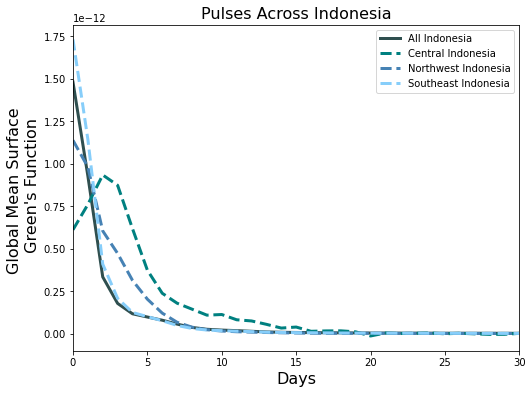

In [10]:
#G_mean.mean(dim = 'run').plot(label = 'Mean')*1e23
fig, ax = plt.subplots(figsize = [8,6])
label_dict = {'Indo_Jan':'All Indonesia','Indo_Jan_Center': 'Central Indonesia', 
              'Indo_Jan_NW': 'Northwest Indonesia', 'Indo_Jan_SE':'Southeast Indonesia'}

for r in ['Indo_Jan','Indo_Jan_Center','Indo_Jan_NW','Indo_Jan_SE']:
    if r == 'Indo_Jan':
        plt.plot(np.arange(0,len(G_mean.sel(run = r)['time'])), G_mean.sel(run = r), label = label_dict[r], color = Indo_colors[r], linewidth = 3)
    else:
        plt.plot(np.arange(0,len(G_mean.sel(run = r)['time'])), G_mean.sel(run = r), label = label_dict[r], color = Indo_colors[r], linewidth = 3, linestyle = 'dashed')
plt.xlim(0,30)
plt.legend()
plt.xlabel('Days', fontsize = 16)
plt.ylabel('Global Mean Surface \n Green\'s Function', fontsize = 16)
plt.title("Pulses Across Indonesia", fontsize = 16)
plt.savefig('figures/indo_loc_plot.pdf', dpi = 250, bbox_inches = 'tight')

## Indonesia Time Plot

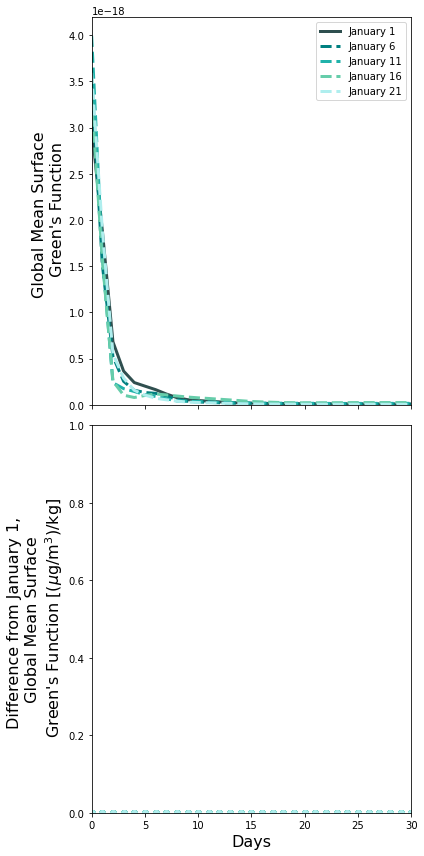

In [16]:
#G_mean.mean(dim = 'run').plot(label = 'Mean')*1e23
fig, (ax1, ax2) = plt.subplots(2,1,figsize = [6,8], sharex = True)

label_dict = {'Indo_Jan':'January 1','Indo_Jan_6': 'January 6','Indo_Jan_11': 'January 11',
             'Indo_Jan_16': 'January 16', 'Indo_Jan_21': 'January 21'}

for r in ['Indo_Jan','Indo_Jan_6','Indo_Jan_11','Indo_Jan_16','Indo_Jan_21',]:
    if r == 'Indo_Jan':
        ax1.plot(np.arange(0,len(G_mean.sel(run = r)['time'])), G_mean.sel(run = r), label = label_dict[r], color = Indo_time_colors[r], linewidth = 3)
    else:
        ax1.plot(np.arange(0,len(G_mean.sel(run = r)['time'])),G_mean.sel(run = r), label = label_dict[r], color = Indo_time_colors[r], linewidth = 3, linestyle = 'dashed')

plt.xlim(0,30)
plt.ylim(0, None)
ax1.legend()
#plt.xlabel('Days', fontsize = 16)
ax1.set_ylabel('Global Mean Surface \n Green\'s Function', fontsize = 16)
#plt.title("Pulses At Varying Times in January in Indonesia", fontsize = 16)
#plt.savefig('figures/indo_time_plot.pdf', dpi = 250, bbox_inches = 'tight')
ax1.set_ylim(0,None)

for r in ['Indo_Jan_6','Indo_Jan_11','Indo_Jan_16','Indo_Jan_21',]:
    data = (G_mean.sel(run = r) - G_mean.sel(run = 'Indo_Jan'))#/G_mean.sel(run = 'Indo_Jan')
    ax2.plot(np.arange(0,len(data['time'])),data, color = Indo_time_colors[r], linewidth = 3, linestyle = 'None', marker = 'o')

plt.xlim(0,30)
#plt.legend()
ax2.set_xlabel('Days', fontsize = 16)
ax2.set_ylabel('Difference from January 1, \n Global Mean Surface \n Green\'s Function [($\mu$g/m$^3$)/kg]', fontsize = 16)
#plt.title("Pulses At Varying Times in January in Indonesia", fontsize = 16)
plt.tight_layout()
plt.savefig('figures/indo_dif_time_plot_both.pdf', dpi = 250, bbox_inches = 'tight')

## All Countries Summed vs. All Countries Pulsed

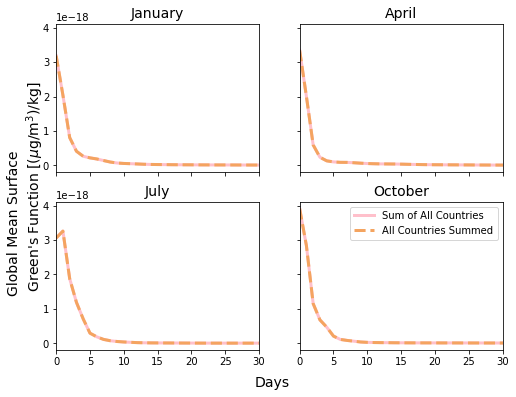

In [40]:
months_dict = {'Jan':'January','Apr':'April','July':'July','Oct':'October'}
fig, axes = plt.subplots(2, 2, sharex = True, sharey = True, figsize = [8,6])
axes = axes.ravel()
for idx, m in enumerate(['Jan','Apr','July','Oct']):
    axes[idx].plot(np.arange(0,len(G_mean.sel(run = r)['time'])), G_mean.sel(run = f'all_countries_summed_{m}'), label = 'Sum of All Countries', color = 'pink', linewidth = 3)
    axes[idx].plot(np.arange(0,len(G_mean.sel(run = r)['time'])), G_mean.sel(run = f'all_countries_{m}'), label = 'All Countries Summed', linestyle = '--', color = 'sandybrown', linewidth = 3)
    axes[idx].set_title(months_dict[m], fontsize = 14)
plt.xlim(0,30)
plt.legend()
fig.text(0.5, 0.04, 'Days', ha='center', fontsize = 14)
fig.text(0.04, 0.5, 'Global Mean Surface \n Green\'s Function [($\mu$g/m$^3$)/kg]', va='center', rotation='vertical', fontsize = 14)
#plt.suptitle("Sum of the Pulse vs. Pulse of the Sum for each Month", fontsize = 16)
plt.savefig('figures/ac_sum_vs_sum_ac.pdf', dpi = 250, bbox_inches = 'tight')

## SEA versus Individual Countries by Season

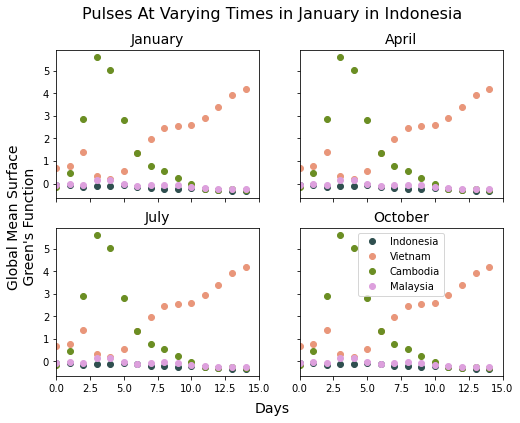

In [36]:
#G_mean.mean(dim = 'run').plot(label = 'Mean')*1e23
label_dict = {'Indo':'Indonesia', 'Malay':'Malaysia','Viet':'Vietnam','Cambod':'Cambodia', 'SEA':'Southeast Asia'}


fig, axes = plt.subplots(2, 2, sharex = True, sharey = True, figsize = [8,6])
axes = axes.ravel()
for idx, m in enumerate(['Jan','Apr','July','Oct']):
    #axes[idx].plot(np.arange(0,len(G_mean.sel(run = r)['time'])), G_mean.sel(run = f'all_countries_{m}'), label = label_dict['SEA'], color = region_colors['SEA'], linewidth = 3)
    for c in ['Indo','Viet','Cambod','Malay']:
        data = (((G_mean.sel(run = f'{c}_Jan'))-G_mean.sel(run = 'all_countries_Jan'))/G_mean.sel(run = 'all_countries_Jan')).isel(time = slice(0,15))
        axes[idx].plot(np.arange(0,len(data['time'])), data, marker = 'o', label = label_dict[c], color = region_colors[c], linestyle = "None")
        axes[idx].set_title(months_dict[m], fontsize = 14)

plt.legend()
plt.xlim(0,15)
fig.text(0.5, 0.04, 'Days', ha='center', fontsize = 14)
fig.text(0.04, 0.5, 'Global Mean Surface \n Green\'s Function', va='center', rotation='vertical', fontsize = 14)
#plt.suptitle("Pulses At Varying Times in January in Indonesia", fontsize = 16)
plt.savefig('figures/ac_v_countries_dif.pdf', dpi = 250, bbox_inches = 'tight')

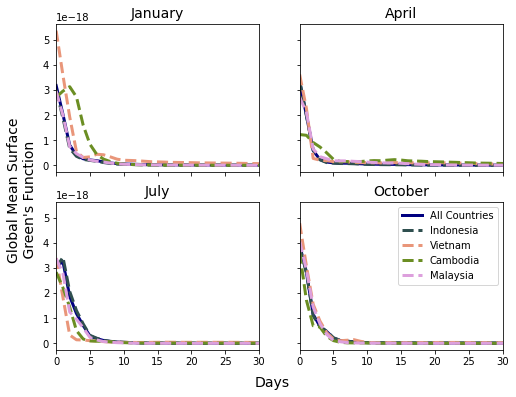

In [15]:
#G_mean.mean(dim = 'run').plot(label = 'Mean')*1e23
label_dict = {'Indo':'Indonesia', 'Malay':'Malaysia','Viet':'Vietnam','Cambod':'Cambodia', 'all_countries':'All Countries'}
months_dict = {'Jan':'January','Apr':'April','July':'July','Oct':'October'}


fig, axes = plt.subplots(2, 2, sharex = True, sharey = True, figsize = [8,6])
axes = axes.ravel()
for idx, m in enumerate(['Jan','Apr','July','Oct']):
    axes[idx].plot(np.arange(0,len(G_mean.sel(run = f'all_countries_{m}')['time'])), G_mean.sel(run = f'all_countries_{m}'), label = label_dict['all_countries'], color = region_colors['all_countries'], linewidth = 3)
    for c in ['Indo','Viet','Cambod','Malay']:
        axes[idx].plot(np.arange(0,len(G_mean.sel(run = f'{c}_{m}')['time'])), G_mean.sel(run = f'{c}_{m}'), label = label_dict[c], color = region_colors[c], linewidth = 3, linestyle = '--')
        axes[idx].set_title(months_dict[m], fontsize = 14)

plt.legend()
plt.xlim(0,30)
fig.text(0.5, 0.04, 'Days', ha='center', fontsize = 14)
fig.text(0.04, 0.5, 'Global Mean Surface \n Green\'s Function', va='center', rotation='vertical', fontsize = 14)
#plt.suptitle("Pulses At Varying Times in January in Indonesia", fontsize = 16)
plt.savefig('figures/SEA_v_countries.pdf', dpi = 250, bbox_inches = 'tight')

## Combined linearity test

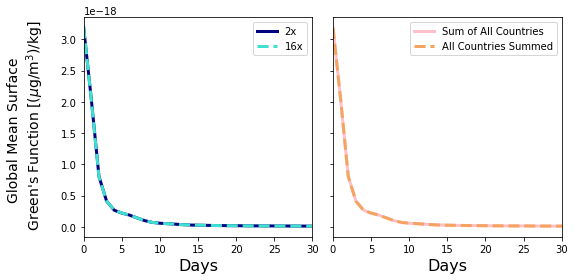

In [19]:
#G_mean.mean(dim = 'run').plot(label = 'Mean')*1e23
label_dict = {'all_countries_Jan_16x':'16x','all_countries_Jan': '2x'}
times_colors = {'all_countries_Jan_16x': 'turquoise','all_countries_Jan':'navy'}
months_dict = {'Jan':'January','Apr':'April','July':'July','Oct':'October'}
fig, (ax1, ax2) = plt.subplots(1,2,figsize = [8,4], sharey = True)

#16x v 2x
ax1.plot(np.arange(0,len(G_mean.sel(run = 'all_countries_Jan')['time'])), G_mean.sel(run = 'all_countries_Jan'), label = label_dict['all_countries_Jan'], 
         color = times_colors['all_countries_Jan'], linewidth = 3)
ax1.plot(np.arange(0,len(G_mean.sel(run = 'all_countries_Jan_16x')['time'])), G_mean.sel(run = 'all_countries_Jan_16x'), label = label_dict['all_countries_Jan_16x'], 
         color = times_colors['all_countries_Jan_16x'], linestyle = '--', linewidth = 3)

    
ax1.legend()
ax1.set_xlim(0,30)
ax1.set_xlabel('Days', fontsize = 16)
ax1.set_ylabel('Global Mean Surface \n Green\'s Function [($\mu$g/m$^3$)/kg]', va='center', rotation='vertical', labelpad = -.3, fontsize = 14)
ax1.yaxis.set_label_coords(-0.25, 0.5)

#all countries summed
ax2.plot(np.arange(0,len(G_mean.sel(run = 'all_countries_summed_Jan')['time'])), G_mean.sel(run = f'all_countries_summed_Jan'), label = 'Sum of All Countries', color = 'pink', linewidth = 3)
ax2.plot(np.arange(0,len(G_mean.sel(run = 'all_countries_Jan')['time'])), G_mean.sel(run = f'all_countries_Jan'), label = 'All Countries Summed', linestyle = '--', color = 'sandybrown', linewidth = 3)


ax2.set_xlim(0,30)
ax2.legend()
ax2.set_xlabel('Days', fontsize = 16)
plt.tight_layout()
#plt.suptitle("Sum of the Pulse vs. Pulse of the Sum for each Month", fontsize = 16)
plt.savefig('figures/linearity_tests.pdf', dpi = 250, bbox_inches = 'tight')


## 16x vs. 2x

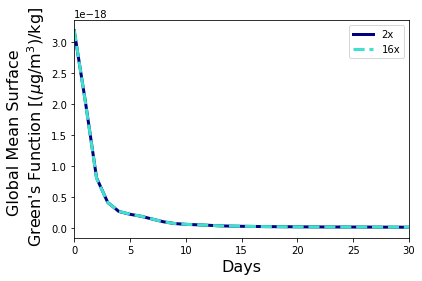

In [39]:
#G_mean.mean(dim = 'run').plot(label = 'Mean')*1e23
label_dict = {'all_countries_Jan_16x':'16x','all_countries_Jan': '2x'}
times_colors = {'all_countries_Jan_16x': 'turquoise','all_countries_Jan':'navy'}
plt.plot(np.arange(0,len(G_mean.sel(run = 'all_countries_Jan')['time'])), G_mean.sel(run = 'all_countries_Jan'), label = label_dict['all_countries_Jan'], 
         color = times_colors['all_countries_Jan'], linewidth = 3)
plt.plot(np.arange(0,len(G_mean.sel(run = 'all_countries_Jan_16x')['time'])), G_mean.sel(run = 'all_countries_Jan_16x'), label = label_dict['all_countries_Jan_16x'], 
         color = times_colors['all_countries_Jan_16x'], linestyle = '--', linewidth = 3)

    
plt.legend()
plt.xlim(0,30)
plt.xlabel('Days', fontsize = 16)
plt.ylabel('Global Mean Surface \n Green\'s Function [($\mu$g/m$^3$)/kg]', fontsize = 16)
#plt.title("16x and 2x pulses in All Countries, January", fontsize = 16)
plt.savefig('figures/16x_2x_jan_plot.pdf', dpi = 250, bbox_inches = 'tight')

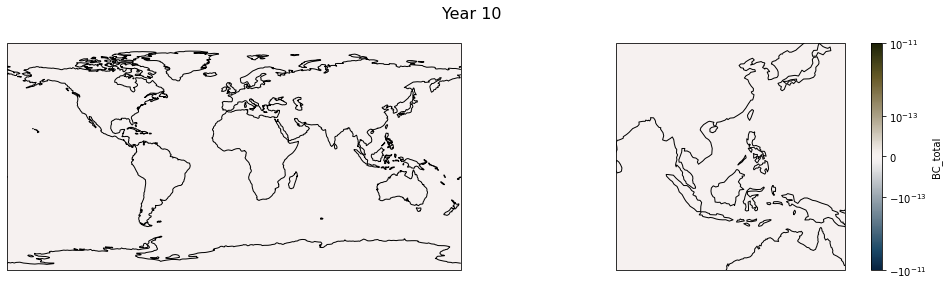

In [13]:
t = 10
fig, (ax1, ax2) = plt.subplots(1,2, figsize = [14,4], subplot_kw={'projection':ccrs.PlateCarree()})
data = (G.sel(run = 'all_countries_Jan_16x').isel(time = t, lev = 0) - 
  G.sel(run = 'all_countries_Jan').isel(time = t, lev = 0))['BC_total']
##### global view #######
(data).plot(ax = ax1, transform = ccrs.PlateCarree(),norm = SymLogNorm(1e-13, 1, -1e-11, 1e-11), 
            add_colorbar = False, cmap = cmocean.cm.diff)
ax1.coastlines()
ax1.set_title('')
##### Zoomed in ########
(data).plot(ax = ax2, transform = ccrs.PlateCarree(), 
            norm = SymLogNorm(1e-13, 1, -1e-11, 1e-11), cmap = cmocean.cm.diff)
ax2.coastlines()
ax2.add_feature(cfeat.STATES)
ax2.set_extent([80,150,-20,40])
ax2.set_title('')
plt.suptitle(f'Year {t}', fontsize = 16);
plt.tight_layout()
plt.savefig(f"figures/16x_2x_map.png", dpi = 350, bbox_inches = 'tight')

## Mean Across Months vs. Individual Months by Country

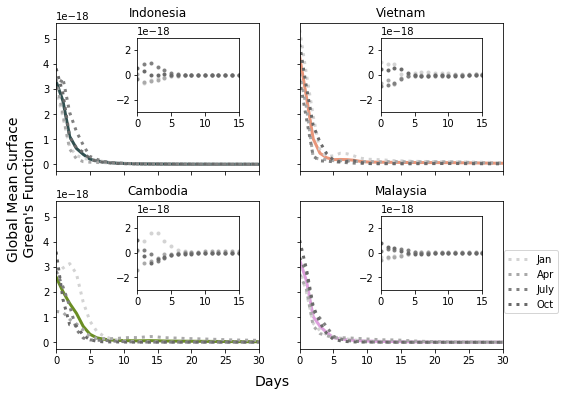

In [10]:
label_dict = {'Indo':'Indonesia', 'Malay':'Malaysia','Viet':'Vietnam','Cambod':'Cambodia'}



fig, axes = plt.subplots(2, 2, sharex = True, sharey = True, figsize = [8,6])
axes = axes.ravel()
for idx, c in enumerate(['Indo','Viet','Cambod','Malay']):
    axes[idx].plot(np.arange(0,len(G_mean.sel(run = f'{c}_Jan')['time'])), G_mean.loc[G_mean.run.isin([f'{c}_Jan', f'{c}_Apr', f'{c}_July', f'{c}_Oct'])].mean(dim = 'run'), 
                   color = region_colors[c], linewidth = 3)
    colors = iter(['lightgrey','darkgrey', 'grey','dimgrey'])
    ##inset
    axins = axes[idx].inset_axes([.4,.4,.5,.5])
    for m in ['Jan','Apr','July','Oct']:
        col = next(colors)
        axes[idx].plot(np.arange(0,len(G_mean.sel(run = f'{c}_{m}')['time'])), G_mean.sel(run = f'{c}_{m}'), label = m, linestyle = ':', color = col, linewidth = 3)
        ##inset for the difference from the mean
        data = (G_mean.sel(run = f'{c}_{m}') - G_mean.loc[G_mean.run.isin([f'{c}_Jan', f'{c}_Apr', f'{c}_July', f'{c}_Oct'])].mean(dim = 'run'))#/G_mean.loc[G_mean.run.isin([f'{c}_Jan', f'{c}_Apr', f'{c}_July', f'{c}_Oct'])].mean(dim = 'run')
        axins.plot(np.arange(0,len(data['time'])), data, color = col, linestyle = 'None', marker = '.')
        axins.set_xlim(0,15)
        axins.set_ylim(-3e-18,3e-18)
        
    axes[idx].set_title(label_dict[c])
    
custom_lines = [Line2D([0], [0], color='black', lw=3)]
axes[3].legend(custom_lines, ['Mean Across Months'])

plt.legend(bbox_to_anchor = (1.1, .5, .2, .2))
plt.xlim(0,30)
fig.text(0.5, 0.04, 'Days', ha='center', fontsize = 14)
fig.text(0.04, 0.5, 'Global Mean Surface \n Green\'s Function', va='center', rotation='vertical', fontsize = 14)
#plt.suptitle("Pulses At Varying Times in January in Indonesia", fontsize = 16)
plt.savefig('figures/monthly_mean_v_months_country.pdf', dpi = 250, bbox_inches = 'tight')

In [ ]:
#G_mean.mean(dim = 'run').plot(label = 'Mean')*1e23
fig, (ax1, ax2) = plt.subplots(2,1,figsize = [6,12], sharex = True)

label_dict = {'Indo_Jan':'January 1','Indo_Jan_6': 'January 6','Indo_Jan_11': 'January 11',
             'Indo_Jan_16': 'January 16', 'Indo_Jan_21': 'January 21'}

for r in ['Indo_Jan','Indo_Jan_6','Indo_Jan_11','Indo_Jan_16','Indo_Jan_21',]:
    if r == 'Indo_Jan':
        ax1.plot(np.arange(0,len(G_mean.sel(run = r)['time'])), G_mean.sel(run = r), label = label_dict[r], color = Indo_time_colors[r], linewidth = 3)
    else:
        ax1.plot(np.arange(0,len(G_mean.sel(run = r)['time'])),G_mean.sel(run = r), label = label_dict[r], color = Indo_time_colors[r], linewidth = 3, linestyle = 'dashed')

plt.xlim(0,30)
plt.ylim(0, None)
ax1.legend()
#plt.xlabel('Days', fontsize = 16)
ax1.set_ylabel('Global Mean Surface \n Green\'s Function', fontsize = 16)
#plt.title("Pulses At Varying Times in January in Indonesia", fontsize = 16)
#plt.savefig('figures/indo_time_plot.pdf', dpi = 250, bbox_inches = 'tight')
ax1.set_ylim(0,None)

for r in ['Indo_Jan_6','Indo_Jan_11','Indo_Jan_16','Indo_Jan_21',]:
    data = (G_mean.sel(run = r) - G_mean.sel(run = 'Indo_Jan'))#/G_mean.sel(run = 'Indo_Jan')
    ax2.plot(np.arange(0,len(data['time'])),data, color = Indo_time_colors[r], linewidth = 3, linestyle = 'None', marker = 'o')

plt.xlim(0,30)
#plt.legend()
ax2.set_xlabel('Days', fontsize = 16)
ax2.set_ylabel('Difference from January 1, \n Global Mean Surface \n Green\'s Function [($\mu$g/m$^3$)/kg]', fontsize = 16)
#plt.title("Pulses At Varying Times in January in Indonesia", fontsize = 16)
plt.tight_layout()
plt.savefig('figures/indo_dif_time_plot_both.pdf', dpi = 250, bbox_inches = 'tight')

## Map

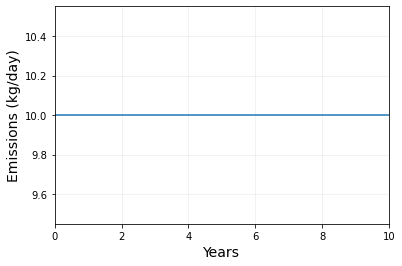

In [10]:
plt.plot(np.ones(11)*10)
plt.xlabel('Years', fontsize = 14)
plt.ylabel('Emissions (kg/day)', fontsize = 14)
plt.grid(alpha = .2)
plt.xlim(0,10)
plt.savefig('figures/emis_ex.png', bbox_inches = 'tight', dpi = 350)

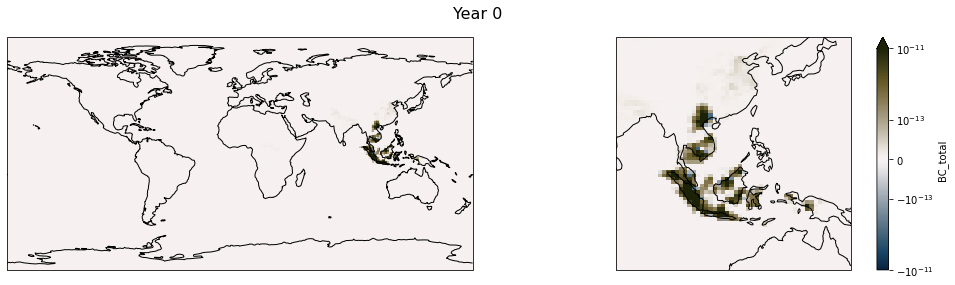

In [12]:
t = 0
fig, (ax1, ax2) = plt.subplots(1,2, figsize = [14,4], subplot_kw={'projection':ccrs.PlateCarree()})
##### global view #######
(G.sel(run = 'all_countries_Jan').isel(time = t, lev = 0)['BC_total']*10*365*10).plot(ax = ax1, transform = ccrs.PlateCarree(), 
                                                                            norm = SymLogNorm(1e-13, 1, -1e-11, 1e-11), add_colorbar = False,
                                                                           cmap = cmocean.cm.diff)
ax1.coastlines()
ax1.set_title('')
##### Zoomed in ########
(G.sel(run = 'all_countries_Jan').isel(time = t, lev = 0)['BC_total']*10*365*10).plot(ax = ax2, transform = ccrs.PlateCarree(), 
                                                                            norm = SymLogNorm(1e-13, 1, -1e-11, 1e-11),
                                                                           cmap = cmocean.cm.diff)
ax2.coastlines()
ax2.add_feature(cfeat.STATES)
ax2.set_extent([80,150,-20,40])
ax2.set_title('')
plt.suptitle(f'Year {t}', fontsize = 16);
plt.tight_layout()
#plt.savefig(f"figures/conv_explainer_time{t}.png", dpi = 350, bbox_inches = 'tight')

In [ ]:
t = 10
fig, (ax1, ax2) = plt.subplots(1,2, figsize = [14,4], subplot_kw={'projection':ccrs.PlateCarree()})
##### global view #######
(G.sel(run = 'all_countries_Jan').isel(s = t, lev = 0)['BC_total']*10*365*10).plot(ax = ax1, transform = ccrs.PlateCarree(), 
                                                                            norm = SymLogNorm(1e-16, 1, -1e-13, 1e-13), add_colorbar = False,
                                                                           cmap = cmocean.cm.diff)
ax1.coastlines()
ax1.set_title('')
##### Zoomed in ########
(G.sel(run = 'all_countries_Jan').isel(s = t, lev = 0)['BC_total']*10*365*10).plot(ax = ax2, transform = ccrs.PlateCarree(), 
                                                                            norm = SymLogNorm(1e-16, 1, -1e-13, 1e-13),
                                                                           cmap = cmocean.cm.diff)
ax2.coastlines()
ax2.add_feature(cfeat.STATES)
ax2.set_extent([80,150,-20,40])
ax2.set_title('')
plt.suptitle(f'Year {t}', fontsize = 16);
plt.tight_layout()
plt.savefig(f"figures/conv_explainer_time{t}.png", dpi = 350, bbox_inches = 'tight')

## Video 3D

In [24]:
for t in np.arange(0,41):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = [14,4], subplot_kw={'projection':ccrs.PlateCarree()})
    ##### global view #######
    (G.sel(run = 'all_countries_Apr').isel(time = t, lev = 0)['BC_total']).plot(ax = ax1, transform = ccrs.PlateCarree(), 
                                                                                norm = SymLogNorm(5e-18, 1, -1e-15, 1e-15), add_colorbar = False,
                                                                               cmap = cmocean.cm.diff)
    ax1.coastlines()
    ax1.set_title('')
    ##### Zoomed in ########
    (G.sel(run = 'all_countries_Apr').isel(time = t, lev = 0)['BC_total']).plot(ax = ax2, transform = ccrs.PlateCarree(), 
                                                                                norm = SymLogNorm(5e-18, 1, -1e-15, 1e-15),
                                                                               cmap = cmocean.cm.diff)
    ax2.coastlines()
    ax2.add_feature(cfeat.STATES)
    ax2.set_extent([80,150,-20,40])
    ax2.set_title('')
    plt.suptitle(f'Day {t}', fontsize = 16);
    plt.tight_layout()
    plt.savefig("figures/GF_video/" + str(t).zfill(4) + ".png", dpi = 350, bbox_inches = 'tight')
    plt.close();

## Convolved 16x vs. 2x step output

In [25]:
pulse_size = '16x'

#16x pulse for GF
Jan_2x_conc = xr.open_mfdataset(f'../GCrundirs/IRF_runs/stretch_2x/SEA/Jan/mod_output/GEOSChem.SpeciesConc.2016*', combine = 'by_coords')
#16x pulse for GF
Jan_2x_emis = xr.open_mfdataset(f'../GCrundirs/IRF_runs/stretch_2x/SEA/Jan/mod_output/GEOSChem.Emissions.2016*', combine = 'by_coords')
#base
base_emis = xr.open_mfdataset(f'../GCrundirs/IRF_runs/stretch_base/template/Jan/mod_output/GEOSChem.Emissions.2016*', combine = 'by_coords')


In [47]:
base_conc = xr.open_mfdataset(f'../GCrundirs/IRF_runs/stretch_base/template/Jan/mod_output/GEOSChem.SpeciesConc.2016*', combine = 'by_coords')


In [48]:
Jan_2x_dif = Jan_2x_conc - base_conc

In [53]:
Jan_2x_dif['BC_total'] = Jan_2x_dif['SpeciesConc_BCPI'] + Jan_2x_dif['SpeciesConc_BCPO']

In [58]:
Jan_2x_dif = Jan_2x_dif.rename({'time':'s'})

In [69]:
Jan_2x_dif['s'] = np.arange(0, len(Jan_2x_dif['s']))

In [27]:
G_lev0 = G.sel(run = 'SEA_Jan_16x').isel(lev = 0)['BC_total']

In [45]:
G_lev0 = G_lev0.rename({'time':'s'})

In [140]:
emis_16x_dif = ((Jan_2x_emis-base_emis)['EmisBCPO_Total']+(Jan_2x_emis-base_emis)['EmisBCPI_Total']).weighted(area_ds['area']).isel(lev = -1).sum(dim = ['lat','lon'])

In [146]:
emis_16x_dif.values

array([1.19602736e-10, 1.19602736e-10, 1.19602736e-10, 1.19602736e-10,
       1.19602736e-10, 1.19602736e-10, 1.19602736e-10, 1.19602736e-10,
       1.19602736e-10, 1.19602736e-10, 1.19602736e-10, 1.19602736e-10,
       1.19602736e-10, 1.19602736e-10, 1.19602736e-10, 1.19602736e-10,
       1.19602736e-10, 1.19602736e-10, 1.19602736e-10, 1.19602736e-10,
       1.19602736e-10, 1.19602736e-10, 1.19602736e-10, 1.19602736e-10,
       1.19602736e-10, 1.19602736e-10, 1.19602736e-10, 1.19602736e-10,
       1.19595325e-10, 1.19595325e-10, 1.19595325e-10, 1.19595325e-10,
       1.19595325e-10, 1.19595325e-10, 1.19595325e-10, 1.19595325e-10,
       1.19595325e-10, 1.19595325e-10, 1.19595325e-10, 1.19595325e-10,
       1.19595325e-10, 1.19595325e-10, 1.19595325e-10, 1.19595325e-10,
       1.19595325e-10, 1.19595325e-10, 1.19595325e-10, 1.19595325e-10,
       1.19595325e-10, 1.19595325e-10, 1.19595325e-10, 1.19595325e-10,
       1.19595325e-10, 1.19595325e-10, 1.19595325e-10, 1.19595325e-10])

In [141]:
conv_16x = signal.convolve(np.array(G_lev0.isel(s = slice(0,len(emis_16x_dif)))) , np.array(emis_16x_dif.values)[..., None, None], mode = 'full')


In [142]:
def np_to_xr(C, G, E):
    E_len = len(E)
    G_len = len(G.s)
    C = xr.DataArray(
    data = C,
    dims = ['s','lat','lon'],
    coords = dict(
        s = (['s'], np.arange(0, C.shape[0])), #np.arange(0,(E_len+G_len))),
        lat = (['lat'], G.lat.values),
        lon = (['lon'], G.lon.values)
            )
        )
    return(C)

In [ ]:
conv_16x = np_to_xr(conv_16x, G_lev0, np.array(emis_16x_dif))

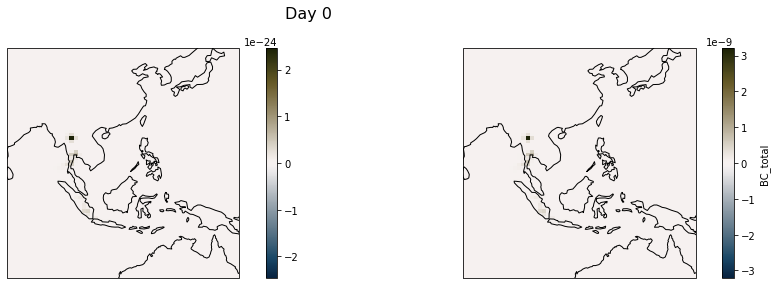

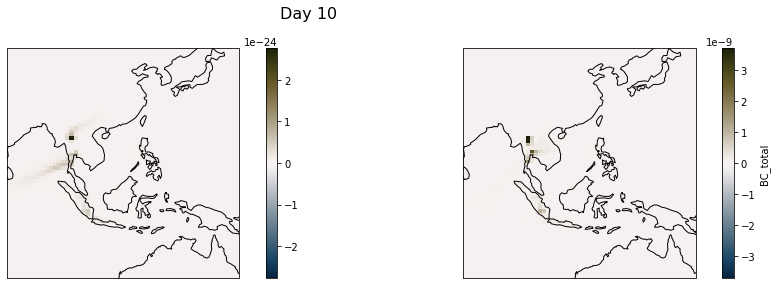

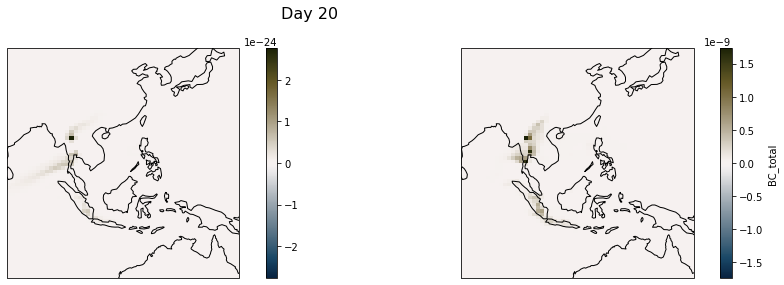

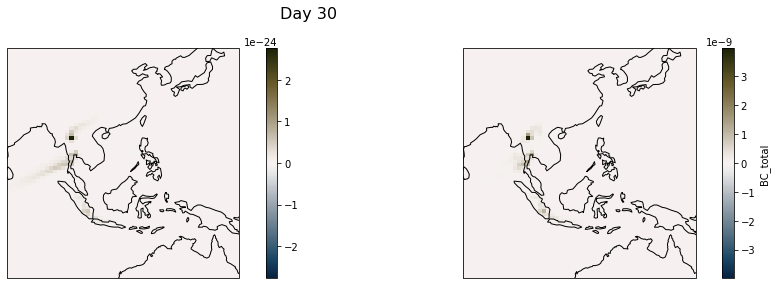

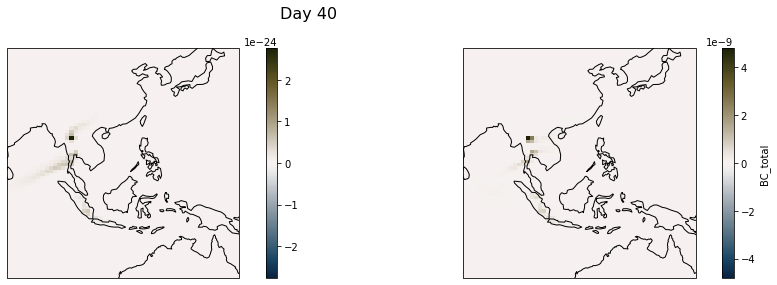

In [ ]:
for t in [0,10,20,30,40]:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = [14,4], subplot_kw={'projection':ccrs.PlateCarree()})
    ##### global view #######
    (conv_16x.isel(s = t)).plot(ax = ax1, transform = ccrs.PlateCarree(), 
                                                                                #norm = SymLogNorm(1e-19, 1, -1e-16, 1e-16), add_colorbar = False,
                                                                               cmap = cmocean.cm.diff)
    ax1.coastlines()
    ax1.set_title('')
    ax1.set_extent([80,150,-20,40])
    ##### Zoomed in ########
    (Jan_2x_dif.isel(lev = 0).isel(s = t)['BC_total']).plot(ax = ax2, transform = ccrs.PlateCarree(), 
                                                                                #norm = SymLogNorm(1e-19, 1, -1e-16, 1e-16),
                                                                               cmap = cmocean.cm.diff)
    ax2.coastlines()
    ax2.add_feature(cfeat.STATES)
    ax2.set_extent([80,150,-20,40])
    ax2.set_title('')
    plt.suptitle(f'Day {t}', fontsize = 16);
    plt.tight_layout()
    #plt.savefig("figures/GF_video/" + str(t).zfill(4) + ".png", dpi = 350, bbox_inches = 'tight')
    #plt.close();

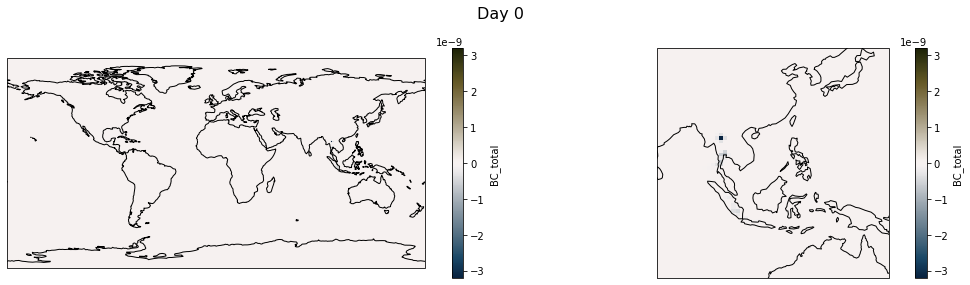

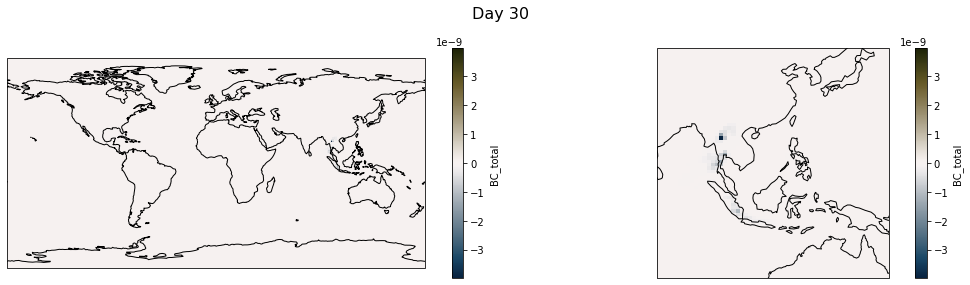

In [139]:
for t in [0,30]:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = [14,4], subplot_kw={'projection':ccrs.PlateCarree()})
    ##### global view #######
    ((conv_16x - Jan_2x_dif.isel(lev = 0)).isel(s = t)['BC_total']).plot(ax = ax1, transform = ccrs.PlateCarree(), 
                                                                                #norm = SymLogNorm(1e-19, 1, -1e-16, 1e-16), add_colorbar = False,
                                                                               cmap = cmocean.cm.diff)
    ax1.coastlines()
    ax1.set_title('')
    ##### Zoomed in ########
    ((conv_16x - Jan_2x_dif.isel(lev = 0)).isel(s = t)['BC_total']).plot(ax = ax2, transform = ccrs.PlateCarree(), 
                                                                                #norm = SymLogNorm(1e-19, 1, -1e-16, 1e-16),
                                                                               cmap = cmocean.cm.diff)
    ax2.coastlines()
    ax2.add_feature(cfeat.STATES)
    ax2.set_extent([80,150,-20,40])
    ax2.set_title('')
    plt.suptitle(f'Day {t}', fontsize = 16);
    plt.tight_layout()
    #plt.savefig("figures/GF_video/" + str(t).zfill(4) + ".png", dpi = 350, bbox_inches = 'tight')
    #plt.close();

In [122]:
mean_conv = conv_16x.weighted(area_ds['area']).mean(dim = ['lat','lon'])

In [123]:
mean_Jan_dif_2x = Jan_2x_dif.isel(lev = 0).weighted(area_ds['area']).mean(dim = ['lat','lon'])

In [131]:
mean_Jan_dif_2x['BC_total'].values

array([4.62559058e-13, 1.03921991e-12, 1.37072751e-12, 1.52857213e-12,
       1.48235477e-12, 1.44907017e-12, 1.49750820e-12, 1.54353734e-12,
       1.37242098e-12, 1.27490574e-12, 1.29468341e-12, 1.47640733e-12,
       1.30168689e-12, 1.25578198e-12, 1.24840695e-12, 1.22092281e-12,
       1.29599895e-12, 1.31671658e-12, 1.32294338e-12, 1.46578036e-12,
       1.37806546e-12, 1.40310767e-12, 1.26353623e-12, 1.19089135e-12,
       1.27036428e-12, 1.48042066e-12, 1.62549114e-12, 1.83555084e-12,
       1.46682022e-12, 1.38953301e-12, 1.62189997e-12, 1.79579882e-12,
       1.83535941e-12, 1.89489927e-12, 1.78841972e-12, 1.93889228e-12,
       2.14208744e-12, 2.33479193e-12, 2.36127127e-12, 2.17676486e-12,
       2.00316407e-12, 1.84275857e-12, 1.74312412e-12, 1.67150203e-12,
       1.80295285e-12, 1.89750704e-12, 1.99018413e-12, 1.86499797e-12,
       2.09409963e-12, 2.17904606e-12, 1.87669311e-12, 1.74146836e-12,
       1.73599422e-12, 1.80409878e-12, 1.98698628e-12, 2.02510880e-12])

In [128]:
mean_conv

<xarray.DataArray (s: 111)>
array([1.05049713e-32, 1.88406345e-32, 2.47033967e-32, 2.87687395e-32,
       3.06837812e-32, 3.17693329e-32, 3.26663917e-32, 3.34215006e-32,
       3.40366469e-32, 3.45055532e-32, 3.48807092e-32, 3.52166506e-32,
       3.55120763e-32, 3.57612585e-32, 3.59669118e-32, 3.61539428e-32,
       3.63241988e-32, 3.64800969e-32, 3.66300063e-32, 3.67758623e-32,
       3.69141796e-32, 3.70436800e-32, 3.71679438e-32, 3.72860216e-32,
       3.73958786e-32, 3.74987373e-32, 3.75970423e-32, 3.76890833e-32,
       3.77741467e-32, 3.78544102e-32, 3.79304830e-32, 3.80024190e-32,
       3.80699665e-32, 3.81328277e-32, 3.81913289e-32, 3.82463235e-32,
       3.82976756e-32, 3.83450277e-32, 3.83887548e-32, 3.84291252e-32,
       3.84665331e-32, 3.85014564e-32, 3.85342000e-32, 3.85648329e-32,
       3.85935061e-32, 3.86202913e-32, 3.86450230e-32, 3.86678290e-32,
       3.86888042e-32, 3.87081866e-32, 3.87262654e-32, 3.87430654e-32,
       3.87586264e-32, 3.87729788e-32, 3.87862728e-32, 3.87986602e-32,
       2.82943317e-32, 1.99591778e-32, 1.40967725e-32, 1.00316761e-32,
       8.11674833e-33, 7.03125968e-33, 6.13425265e-33, 5.37918694e-33,
       4.76407540e-33, 4.29519506e-33, 3.92005956e-33, 3.58413632e-33,
       3.28872657e-33, 3.03955758e-33, 2.83391492e-33, 2.64689357e-33,
       2.47664630e-33, 2.32075619e-33, 2.17085453e-33, 2.02500610e-33,
       1.88669608e-33, 1.75720243e-33, 1.63294522e-33, 1.51487370e-33,
       1.40502242e-33, 1.30216920e-33, 1.20386947e-33, 1.11183342e-33,
       1.02612723e-33, 9.45354442e-34, 8.68924757e-34, 7.96742403e-34,
       7.29080923e-34, 6.66156668e-34, 6.07603685e-34, 5.52565934e-34,
       5.01179066e-34, 4.53800913e-34, 4.10053350e-34, 3.69664727e-34,
       3.32240938e-34, 2.97304441e-34, 2.64550155e-34, 2.33907601e-34,
       2.05225662e-34, 1.78432469e-34, 1.53693071e-34, 1.30879541e-34,
       1.09897081e-34, 9.05078304e-35, 7.24225527e-35, 5.56162210e-35,
       4.00494795e-35, 2.56915731e-35, 1.23923307e-35])
Coordinates:
  * s        (s) int64 0 1 2 3 4 5 6 7 8 ... 102 103 104 105 106 107 108 109 110

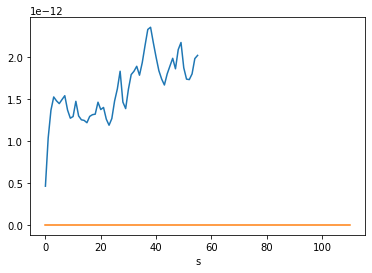

In [127]:
mean_Jan_dif_2x['BC_total'].plot()
mean_conv.plot()

## Old

In [ ]:
for t in np.arange(0,41):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = [14,4], subplot_kw={'projection':ccrs.PlateCarree()})
    ##### global view #######
    (G.sel(run = 'all_countries_Jan').isel(time = t, lev = 0)['BC_total']).plot(ax = ax1, transform = ccrs.PlateCarree(), 
                                                                                norm = SymLogNorm(1e-19, 1, -1e-16, 1e-16), add_colorbar = False,
                                                                               cmap = cmocean.cm.diff)
    ax1.coastlines()
    ax1.set_title('')
    ##### Zoomed in ########
    (G.sel(run = 'all_countries_Jan').isel(time = t, lev = 0)['BC_total']).plot(ax = ax2, transform = ccrs.PlateCarree(), 
                                                                                norm = SymLogNorm(1e-19, 1, -1e-16, 1e-16),
                                                                               cmap = cmocean.cm.diff)
    ax2.coastlines()
    ax2.add_feature(cfeat.STATES)
    ax2.set_extent([80,150,-20,40])
    ax2.set_title('')
    plt.suptitle(f'Day {t}', fontsize = 16);
    plt.tight_layout()
    #plt.savefig("figures/GF_video/" + str(t).zfill(4) + ".png")


In [ ]:
fig, ax = plt.subplots(1,1, subplot_kw={'projection':ccrs.PlateCarree()})
ds_conc.sel(run = 'base')['BC_total'].isel(lev = -1, time = 50).plot(ax = ax, 
                                                    transform = ccrs.PlateCarree(), 
                                                    levels = np.arange(0,2e-12,1e-14),
                                                    #extend = 'both',
                                                    cmap = 'gist_heat_r', cbar_kwargs = dict(label=''))
ax.coastlines()
ax.set_extent([80,150,-20,40])
ax.set_title(f'Base concentration \n (day 50)', fontsize = 16)

/tmp/ipykernel_3324959/2422029135.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, xlim=[-180, 180], ylim=[-90, 90])


(0.0, 9e-23)

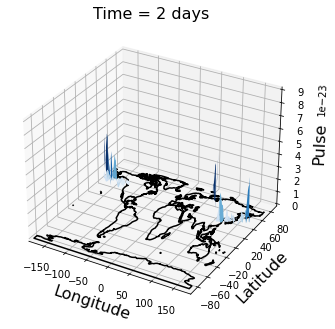

In [63]:
fig = plt.figure()
ax = Axes3D(fig, xlim=[-180, 180], ylim=[-90, 90])
ax.set_zlim(bottom=0)


concat = lambda iterable: list(itertools.chain.from_iterable(iterable))

target_projection = ccrs.PlateCarree()

feature = cartopy.feature.NaturalEarthFeature('physical', 'land', '110m')
geoms = feature.geometries()

geoms = [target_projection.project_geometry(geom, feature.crs)
         for geom in geoms]

paths = concat(geos_to_path(geom) for geom in geoms)

polys = concat(path.to_polygons() for path in paths)

# lc = PolyCollection(polys, edgecolor='black',
#                     facecolor='green', closed=False)
lc = LineCollection(polys, color='black')

ax.add_collection3d(lc)



(G.isel(time = 2, lev = -1)).sel(run = 'SEA_Jan').where((G.isel(time = 2, lev = -1)).sel(run = 'SEA_Jan') > 0.)['BC_total'].plot.surface(cmap = 'Blues', ax = ax,  add_colorbar=False, vmin = 0, vmax = .2e-22)

ax.set_xlabel('Longitude', fontsize = 16)
ax.set_ylabel('Latitude', fontsize = 16)
ax.set_zlabel('Pulse', fontsize = 16)
ax.set_title(r'Time = 2 days', fontsize = 16)

ax.set_zlim(0., .9e-22)

#plt.savefig('figures/IGAC/pulse_2.png', dpi = 250, bbox_inches = 'tight')

/tmp/ipykernel_7263/821010165.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, xlim=[-180, 180], ylim=[-90, 90])


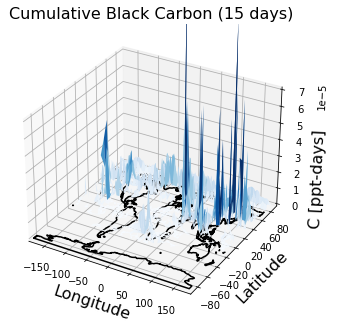

In [146]:
fig = plt.figure()
ax = Axes3D(fig, xlim=[-180, 180], ylim=[-90, 90])
ax.set_zlim(bottom=0)


concat = lambda iterable: list(itertools.chain.from_iterable(iterable))

target_projection = ccrs.PlateCarree()

feature = cartopy.feature.NaturalEarthFeature('physical', 'land', '110m')
geoms = feature.geometries()

geoms = [target_projection.project_geometry(geom, feature.crs)
         for geom in geoms]

paths = concat(geos_to_path(geom) for geom in geoms)

polys = concat(path.to_polygons() for path in paths)

# lc = PolyCollection(polys, edgecolor='black',
#                     facecolor='green', closed=False)
lc = LineCollection(polys, color='black')

ax.add_collection3d(lc)



(1e12*f0['SEA_Jan']*G.isel(time = slice(0,15), lev = -1)).sel(run = 'SEA_Jan').sum(dim = 'time').where(
    (G.isel(time = slice(0,15), lev = -1)).sum(dim = 'time').sel(run = 'SEA_Jan') > 1e-24).plot.surface(
    cmap = 'Blues', ax = ax,  add_colorbar=False, vmin = 0, vmax = 3e-5)

ax.set_xlabel('Longitude', fontsize = 16)
ax.set_ylabel('Latitude', fontsize = 16)
ax.set_zlabel('C [ppt-days]              ', fontsize = 16)
ax.set_title(r'Cumulative Black Carbon (15 days)', fontsize = 16)

ax.set_zlim(0., 7e-5)

plt.savefig('figures/IGAC/pulse_cumul_15.png', dpi = 250, bbox_inches = 'tight')

77926.38874983042

/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in log10
  return func(*(_execute_task(a, cache) for a in args))


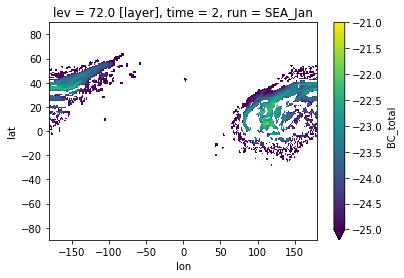

In [60]:
(np.log10(G.isel(time = 2, lev = -1)).sel(run = 'SEA_Jan')).plot(vmin=-25, vmax=-21)

Text(0.5, 1.0, '')

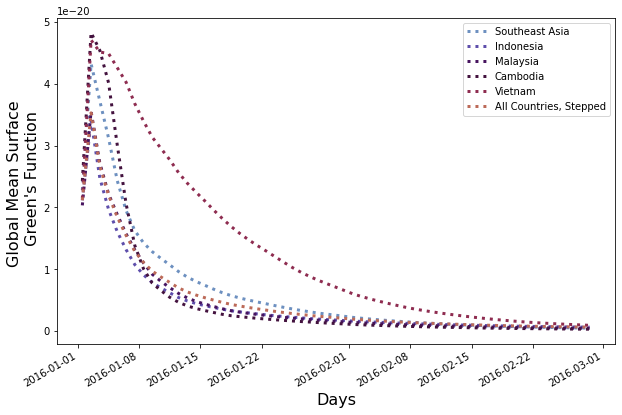

In [35]:
fig, ax = plt.subplots(figsize = [10,6])
color = iter(cm.twilight(np.linspace(.2, .9, 7)))
for r in regions[:-1]:
    c = next(color)
    
    G_mean.mean(dim = 'run').plot(label = utils.names_dict[r], linestyle = 'dotted', linewidth = 3, c = c)
plt.legend()
plt.xlabel('Days', fontsize = 16)
plt.ylabel('Global Mean Surface \n Green\'s Function', fontsize = 16)
plt.title('')
#plt.savefig('figures/G.png', dpi = 200, bbox_inches = 'tight')

Text(0.5, 1.0, '')

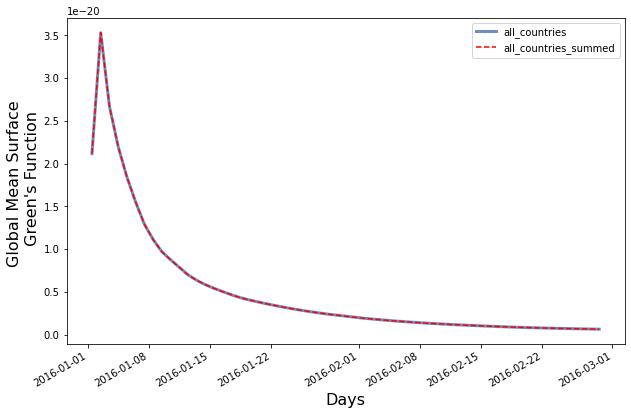

In [25]:
fig, ax = plt.subplots(figsize = [10,6])
color = iter(cm.twilight(np.linspace(.2, .9, 8)))
for r in ['all_countries','all_countries_summed']:
    c = next(color)
    if 'summed' in r:
        G_mean.sel(run = r).plot(label = r, linestyle = 'dashed', c= 'red')
    else:
        G_mean.sel(run = r).plot(label = r, linestyle = 'solid', linewidth = 3, c = c)
plt.legend()
plt.xlabel('Days', fontsize = 16)
plt.ylabel('Global Mean Surface \n Green\'s Function', fontsize = 16)
plt.title('')
#plt.savefig('figures/G.png', dpi = 200, bbox_inches = 'tight')

## Location Average test 

In [55]:
ds_emis = ds_emis.rename({'time':'tp'})

In [56]:
ds_emis = ds_emis.assign_coords(tp = np.arange(0,len(ds_emis['tp'])))

In [58]:
ds_emis_gmean = {}
for r in ['SEA', 'Indo', 'Malay', 'Viet', 'Cambod', 'all_countries']:
    ds_emis_gmean[r] = (ds_emis.sel(run = r)-
                 ds_emis.sel(run = 'base'))['EmisBC_Total'].weighted(
    (ds_emis['area'].fillna(0)).sel(run = 'base')).sum(dim = ['lat','lon']).compute()


In [59]:
G_loc = G.sel(lat = 25, lon = 114, method = 'nearest').isel(lev = 0)

In [66]:
out_mean = {}
for r in ['SEA', 'Indo', 'Malay', 'Viet', 'Cambod', 'all_countries']:
    out_mean[r] = utils.convolve_global_mean(G_loc.sel(run = r).compute(), ds_emis_gmean[r], dt = dt, time_dim = 'time')

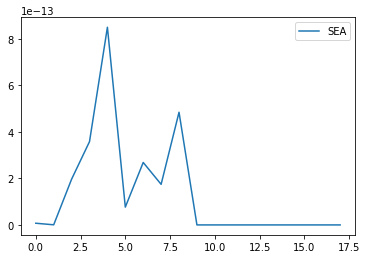

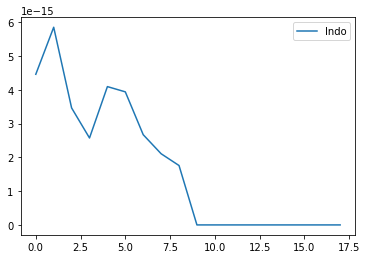

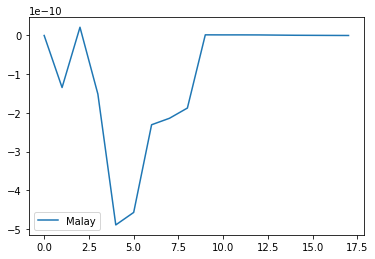

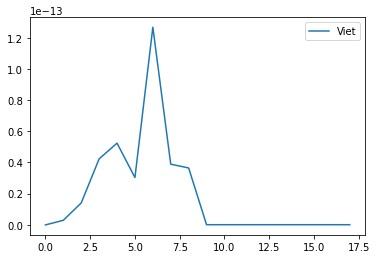

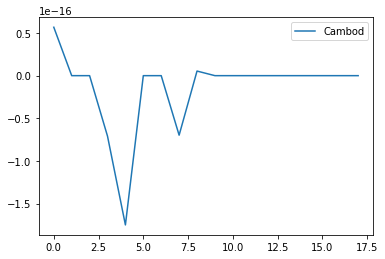

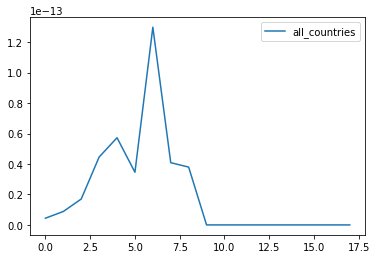

In [69]:
for r in ['SEA', 'Indo', 'Malay', 'Viet', 'Cambod', 'all_countries']:
    fig, ax = plt.subplots()
    plt.plot(out_mean[r], label = r)
    plt.legend()

## Global Mean Test

In [71]:
out_gmean = {}
for r in ['SEA', 'Indo', 'Malay', 'Viet', 'Cambod', 'all_countries']:
    out_gmean[r] = utils.convolve_global_mean(G_mean.sel(run = r).compute(), ds_emis_gmean[r], dt = dt, time_dim = 'time')

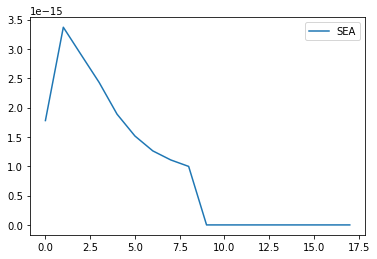

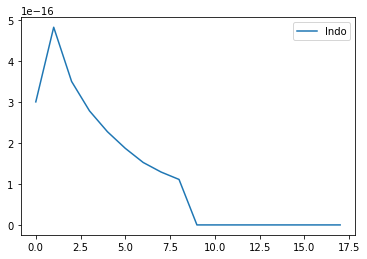

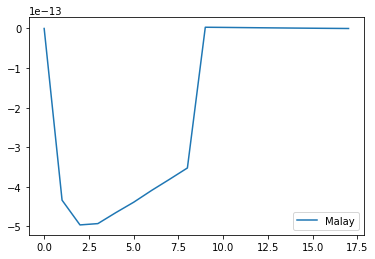

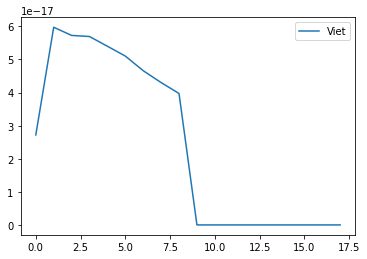

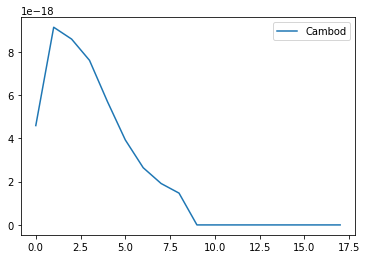

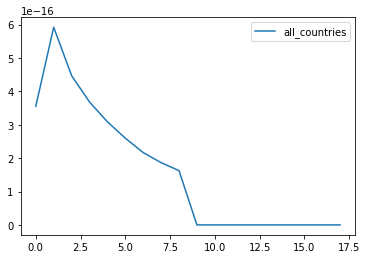

In [75]:
for r in ['SEA', 'Indo', 'Malay', 'Viet', 'Cambod', 'all_countries']:
    fig, ax = plt.subplots()
    plt.plot(out_gmean[r], label = r)
    plt.legend()

# Plots

Text(0.5, 1.0, '')

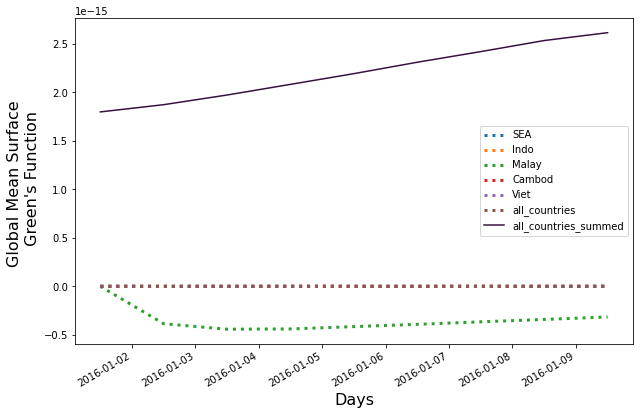

In [100]:
G_mean

<xarray.DataArray 'BC_total' (run: 7, time: 9)>
dask.array<concatenate, shape=(7, 9), dtype=float64, chunksize=(1, 1), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01T12:00:00 ... 2016-01-09T12:00:00
  * run      (run) object 'SEA' 'Indo' ... 'all_countries_summed'

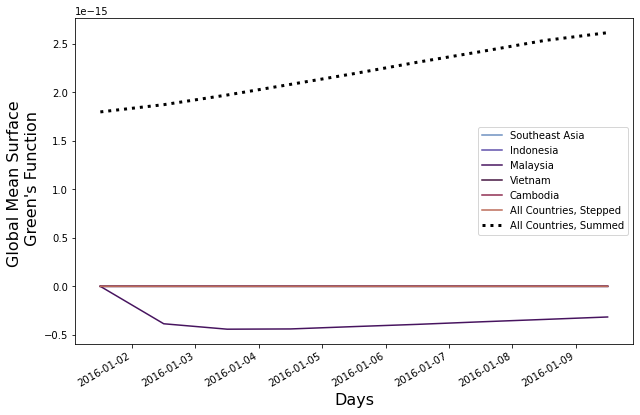

In [99]:

fig, ax = plt.subplots(figsize = [10,6])
color = iter(cm.twilight(np.linspace(.2, .9, 7)))
for r in ['SEA', 'Indo', 'Malay', 'Viet', 'Cambod', 'all_countries', 'all_countries_summed']:
    c = next(color)
    if r != 'all_countries_summed':
        G_mean.sel(run = r).plot(label = utils.names_dict[r], linestyle = 'solid', c= c)
    else:
        G_mean.sel(run = r).plot(label = 'All Countries, Summed', linestyle = 'dotted', c= 'black', linewidth = 3)
plt.legend()
plt.xlabel('Days', fontsize = 16)
plt.ylabel('Global Mean Surface \n Green\'s Function', fontsize = 16)
plt.title('')
plt.savefig('figures/G_spatial_comp.png', dpi = 200, bbox_inches = 'tight')

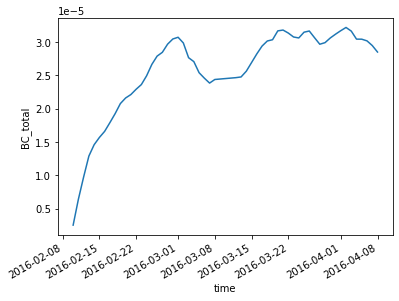

In [113]:
r = 'all_countries'
((utils.global_w_mean(ds_conc.sel(run = r + '_2x').fillna(0), poll_name)-utils.global_w_mean(ds_conc.sel(run = 'base').fillna(0), poll_name))*1e9).plot()

In [ ]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize = [20,4])

color = iter(cm.twilight(np.linspace(.2, .9, 7)))
for r in ['SEA', 'Indo']:
    c = next(color)
    ax1.plot((utils.global_w_mean(ds_conc.sel(run = r + '_2x').fillna(0), poll_name)-
            utils.global_w_mean(ds_conc.sel(run = 'base').fillna(0), poll_name))*1e9, color = c)
    ax1.plot(out_gmean[r]*1e9, label = utils.names_dict[r], linestyle = ':', linewidth = 3, color = c)

#ax1.legend(fontsize = 12)
ax1.set_ylabel('Global Mean Concentration (ppt)', fontsize = 18)
ax1.set_xlabel('Days', fontsize = 18)
ax1.set_xlim(0,60)


color = iter(cm.twilight(np.linspace(.2, .9, 7)))
for r in ['SEA', 'Indo']:
    c = next(color)
    ax2.plot((ds_conc.sel(run = r + '_2x')-ds_conc.sel(run = 'base')).sel(lat = 25, lon = 114, method = 'nearest').fillna(0).isel(lev = 0)['BC_total']*1e9, 
             color = c)
    ax2.plot(out_mean[r]*1e9, label = utils.names_dict[r], linestyle = ':', linewidth = 3, color = c)

#ax2.legend(fontsize = 12)
ax2.set_xlim([0,50])
ax2.set_xlim(0,60)
ax2.set_ylabel('Location Specific Concentration (ppt)', fontsize = 18)
ax2.set_xlabel('Days', fontsize = 18)
ax2.set_yscale("log")  


color = iter(cm.twilight(np.linspace(.2, .9, 7)))
for r in ['SEA', 'Indo']:
    c = next(color)
    if r != 'all_countries_summed':
        G_mean.sel(run = r).plot(ax = ax3, label = utils.names_dict[r], linestyle = 'solid', c= c)
    else:
        G_mean.sel(run = r).plot(ax = ax3, label = 'All Countries, Summed', linestyle = 'dotted', c= 'black', linewidth = 3)
ax3.legend()
ax3.set_xlabel('Days', fontsize = 16)
ax3.set_ylabel('Global Mean Surface \n Green\'s Function', fontsize = 16)
ax3.set_title('')
ax3.set_xlim(0,60)

plt.tight_layout()

#plt.savefig('figures/loc_avg_jan.png', bbox_inches = 'tight', dpi = 200)

(1.5e-13, 2e-13)

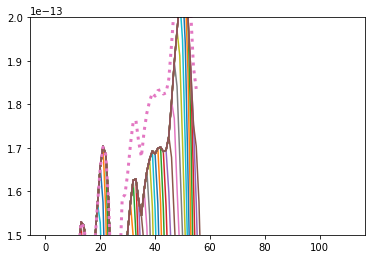

In [37]:
utils.convolve_global_mean(G_mean.sel(run = 'SEA').compute(), np.ones(len(ds_emis_gmean['SEA']))*ds_emis_gmean['SEA'][0].values, dt = dt)
plt.plot((utils.global_w_mean(ds_conc.sel(run = 'SEA_2x').fillna(0), poll_name)-
            utils.global_w_mean(ds_conc.sel(run = 'base').fillna(0), poll_name)), linestyle = ':', linewidth = 3)
plt.ylim(1.5e-13,2.0e-13)

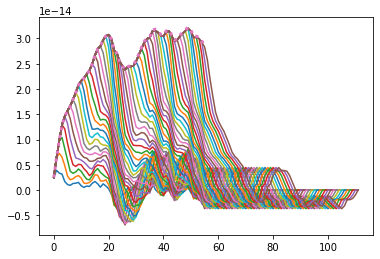

In [43]:
utils.convolve_global_mean(G_mean.sel(run = 'all_countries').compute(), ds_emis_gmean['all_countries'], dt = dt)
plt.plot((utils.global_w_mean(ds_conc.sel(run = 'all_countries_2x').fillna(0), poll_name)-
            utils.global_w_mean(ds_conc.sel(run = 'base').fillna(0), poll_name)), linestyle = ':', linewidth = 3)

<xarray.DataArray (s: 112)>
array([ 1.28277446e-14,  3.62223337e-14,  5.76822234e-14,  7.72638665e-14,
        9.04643790e-14,  1.01862593e-13,  1.14089699e-13,  1.26618541e-13,
        1.38402173e-13,  1.42242655e-13,  1.38418652e-13,  1.37927428e-13,
        1.46135771e-13,  1.52956677e-13,  1.52094363e-13,  1.47661461e-13,
        1.45475822e-13,  1.42392296e-13,  1.48133953e-13,  1.57114440e-13,
        1.65617190e-13,  1.70329357e-13,  1.68536843e-13,  1.58140141e-13,
        1.40067006e-13,  1.34660863e-13,  1.34872101e-13,  1.40579591e-13,
        1.45041224e-13,  1.45954198e-13,  1.50750210e-13,  1.57305843e-13,
        1.62538884e-13,  1.62828843e-13,  1.57892070e-13,  1.54418846e-13,
        1.60322297e-13,  1.64601855e-13,  1.67393729e-13,  1.69275697e-13,
        1.68593336e-13,  1.69894659e-13,  1.70153695e-13,  1.69130962e-13,
        1.69414240e-13,  1.72648825e-13,  1.80610387e-13,  1.89610602e-13,
        1.96939499e-13,  2.03977906e-13,  2.07675600e-13,  2.06910632e-13,
        1.99979738e-13,  1.88040097e-13,  1.75333886e-13,  1.70333573e-13,
        1.57506351e-13,  1.34113166e-13,  1.12654318e-13,  9.30734883e-14,
        7.98734737e-14,  6.84759540e-14,  5.62499204e-14,  4.37220778e-14,
        3.19388136e-14,  2.80983037e-14,  3.19218932e-14,  3.24129690e-14,
        2.42051815e-14,  1.73846202e-14,  1.82468641e-14,  2.26795536e-14,
        2.48650375e-14,  2.79481689e-14,  2.22063738e-14,  1.32258848e-14,
        4.72320807e-15,  1.08961076e-17,  1.80306754e-15,  1.21991673e-14,
        3.02716066e-14,  3.56781576e-14,  3.54677266e-14,  2.97609053e-14,
        2.52987499e-14,  2.43843715e-14,  1.95873188e-14,  1.30308713e-14,
        7.79733285e-15,  7.50667998e-15,  1.24423805e-14,  1.59146046e-14,
        1.00107865e-14,  5.73125551e-15,  2.93979473e-15,  1.05797548e-15,
        1.73978071e-15,  4.38113253e-16,  1.79146884e-16,  1.20209319e-15,
        9.18969098e-16, -2.31522116e-15, -1.02766440e-14, -1.92768577e-14,
       -2.66058277e-14, -3.36440897e-14, -3.73414412e-14, -3.65758707e-14,
       -2.96442813e-14, -1.77050484e-14, -4.99964415e-15,  0.00000000e+00])
Coordinates:
  * s        (s) int64 0 1 2 3 4 5 6 7 8 ... 103 104 105 106 107 108 109 110 111

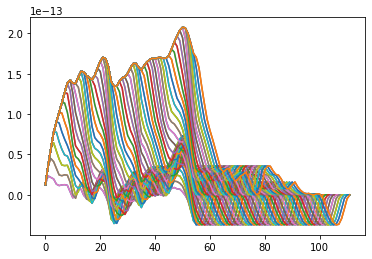

In [125]:
utils.convolve_global_mean(G_mean.sel(run = 'SEA').compute(), np.ones(len(ds_emis_gmean['SEA']))*ds_emis_gmean['SEA'][0].values, dt = dt)
utils.convolve_global_mean(G_mean.sel(run = 'SEA').compute(), ds_emis_gmean['SEA'], dt = dt)


<xarray.DataArray (s: 112)>
array([ 1.28277446e-14,  3.62223337e-14,  5.76822234e-14,  7.72638665e-14,
        9.04643790e-14,  1.01862593e-13,  1.14089699e-13,  1.26618541e-13,
        1.38402173e-13,  1.42242655e-13,  1.38418652e-13,  1.37927428e-13,
        1.46135771e-13,  1.52956677e-13,  1.52094363e-13,  1.47661461e-13,
        1.45475822e-13,  1.42392296e-13,  1.48133953e-13,  1.57114440e-13,
        1.65617190e-13,  1.70329357e-13,  1.68536843e-13,  1.58140141e-13,
        1.40067006e-13,  1.34660863e-13,  1.34872101e-13,  1.40579591e-13,
        1.45041224e-13,  1.45954198e-13,  1.50750210e-13,  1.57305843e-13,
        1.62538884e-13,  1.62828843e-13,  1.57892070e-13,  1.54418846e-13,
        1.60322297e-13,  1.64601855e-13,  1.67393729e-13,  1.69275697e-13,
        1.68593336e-13,  1.69894659e-13,  1.70153695e-13,  1.69130962e-13,
        1.69414240e-13,  1.72648825e-13,  1.80610387e-13,  1.89610602e-13,
        1.96939499e-13,  2.03977906e-13,  2.07675600e-13,  2.06910632e-13,
        1.99979738e-13,  1.88040097e-13,  1.75333886e-13,  1.70333573e-13,
        1.57506351e-13,  1.34113166e-13,  1.12654318e-13,  9.30734883e-14,
        7.98734737e-14,  6.84759540e-14,  5.62499204e-14,  4.37220778e-14,
        3.19388136e-14,  2.80983037e-14,  3.19218932e-14,  3.24129690e-14,
        2.42051815e-14,  1.73846202e-14,  1.82468641e-14,  2.26795536e-14,
        2.48650375e-14,  2.79481689e-14,  2.22063738e-14,  1.32258848e-14,
        4.72320807e-15,  1.08961076e-17,  1.80306754e-15,  1.21991673e-14,
        3.02716066e-14,  3.56781576e-14,  3.54677266e-14,  2.97609053e-14,
        2.52987499e-14,  2.43843715e-14,  1.95873188e-14,  1.30308713e-14,
        7.79733285e-15,  7.50667998e-15,  1.24423805e-14,  1.59146046e-14,
        1.00107865e-14,  5.73125551e-15,  2.93979473e-15,  1.05797548e-15,
        1.73978071e-15,  4.38113253e-16,  1.79146884e-16,  1.20209319e-15,
        9.18969098e-16, -2.31522116e-15, -1.02766440e-14, -1.92768577e-14,
       -2.66058277e-14, -3.36440897e-14, -3.73414412e-14, -3.65758707e-14,
       -2.96442813e-14, -1.77050484e-14, -4.99964415e-15,  0.00000000e+00])
Coordinates:
  * s        (s) int64 0 1 2 3 4 5 6 7 8 ... 103 104 105 106 107 108 109 110 111

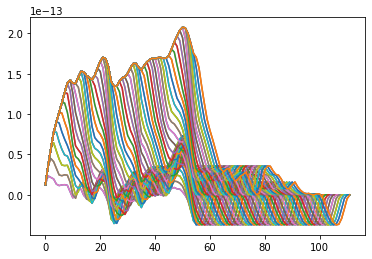

In [124]:
utils.convolve_global_mean(G_mean.sel(run = 'SEA').compute(), np.ones(len(ds_emis_gmean['SEA']))*ds_emis_gmean['SEA'][30].values, dt = dt)
utils.convolve_global_mean(G_mean.sel(run = 'SEA').compute(), ds_emis_gmean['SEA'], dt = dt)


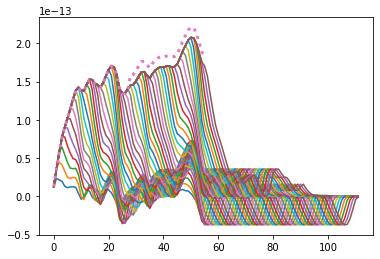

In [127]:
utils.convolve_global_mean(G_mean.sel(run = 'SEA').compute(), np.ones(len(ds_emis_gmean['SEA']))*ds_emis_gmean['SEA'][55].values, dt = dt)
plt.plot((utils.global_w_mean(ds_conc.sel(run = 'SEA_2x').fillna(0), poll_name)-
            utils.global_w_mean(ds_conc.sel(run = 'base').fillna(0), poll_name)), linestyle = ':', linewidth = 3)

array([570310.08878076, 570310.08878076, 570310.08878076, 570310.08878076,
       570310.08878076, 570310.08878076, 570310.08878076, 570310.08878076,
       570310.08878076, 570310.08878076, 570310.08878076, 570310.08878076,
       570310.08878076, 570310.08878076, 570310.08878076, 570310.08878076,
       570310.08878076, 570310.08878076, 570310.08878076, 570310.08878076,
       570310.08878076, 570310.08878076, 570310.08878076, 570310.08878076,
       570310.08878076, 570310.08878076, 570310.08878076, 570310.08878076,
       570310.08878076, 570310.08878076, 570310.08878076, 570310.08878076,
       570310.08878076, 570310.08878076, 570310.08878076, 570310.08878076,
       570310.08878076, 570310.08878076, 570310.08878076, 570310.08878076,
       570310.08878076, 570310.08878076, 570310.08878076, 570310.08878076,
       570310.08878076, 570310.08878076, 570310.08878076, 570310.08878076,
       570310.08878076, 570310.08878076, 570310.08878076, 570310.08878076,
       570310.08878076, 5

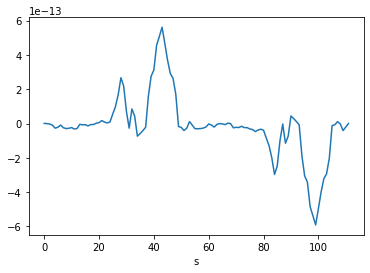

In [35]:
out_mean['SEA'].plot()